# Google Play Store EDA

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

### Import dataset

In [2]:
df = pd.read_csv('data/googleplaystore.csv')
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [3]:
df.shape

(10841, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#### drop null and duplicate values

In [6]:
nrows = df.shape[0]
df.dropna(subset = ['Rating','Type'], inplace = True)
df = df.drop_duplicates(subset = 'App', keep = 'first')
print(nrows - df.shape[0], 'null or duplicate data dropped')

2644 null or duplicate data dropped


In [7]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [8]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

#### delete wrong data 

In [9]:
wrongdata = df[df['Category'] == '1.9']
wrongdata

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
df.drop(wrongdata.index, inplace = True)

In [11]:
def convertSizetoMB(x):
    if x[-1] == 'M':
        mb = float(re.findall(r'(.+)M', x)[0])
        return mb
    if x[-1] == 'k':
        kb = float(re.findall(r'(.+)k', x)[0])
        return kb/1000

    if x == 'Varies with device':
        return -1

In [12]:
def convertPrice(x):
    if x == '0':
        return 0
    else:
        price = float(x[1:])
        return price

In [13]:
df['Reviews'] = df['Reviews'].astype(np.int32)
df['Size'] = df['Size'].apply(convertSizetoMB)
df['Installs'] = df['Installs'].apply(lambda x : int( x[:-1].replace(',', '')))
df['Price'] = df['Price'].apply(convertPrice)
df['month'] = df['Last Updated'].apply(lambda x: x.split()[0])
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8196 non-null   object        
 1   Category        8196 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         8196 non-null   int32         
 4   Size            8196 non-null   float64       
 5   Installs        8196 non-null   int64         
 6   Type            8196 non-null   object        
 7   Price           8196 non-null   float64       
 8   Content Rating  8196 non-null   object        
 9   Genres          8196 non-null   object        
 10  Last Updated    8196 non-null   datetime64[ns]
 11  Current Ver     8192 non-null   object        
 12  Android Ver     8194 non-null   object        
 13  month           8196 non-null   object        
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), o

In [15]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,8196.000000,8.196000e+03,8196.000000,8.196000e+03,8196.000000
mean,4.173243,2.552515e+05,18.508951,9.165090e+06,1.037884
std,0.536625,1.985594e+06,22.497571,5.825087e+07,16.857882
min,1.000000,1.000000e+00,-1.000000,1.000000e+00,0.000000
25%,4.000000,1.260000e+02,2.800000,1.000000e+04,0.000000
50%,4.300000,3.004000e+03,9.400000,1.000000e+05,0.000000
75%,4.500000,4.381300e+04,27.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


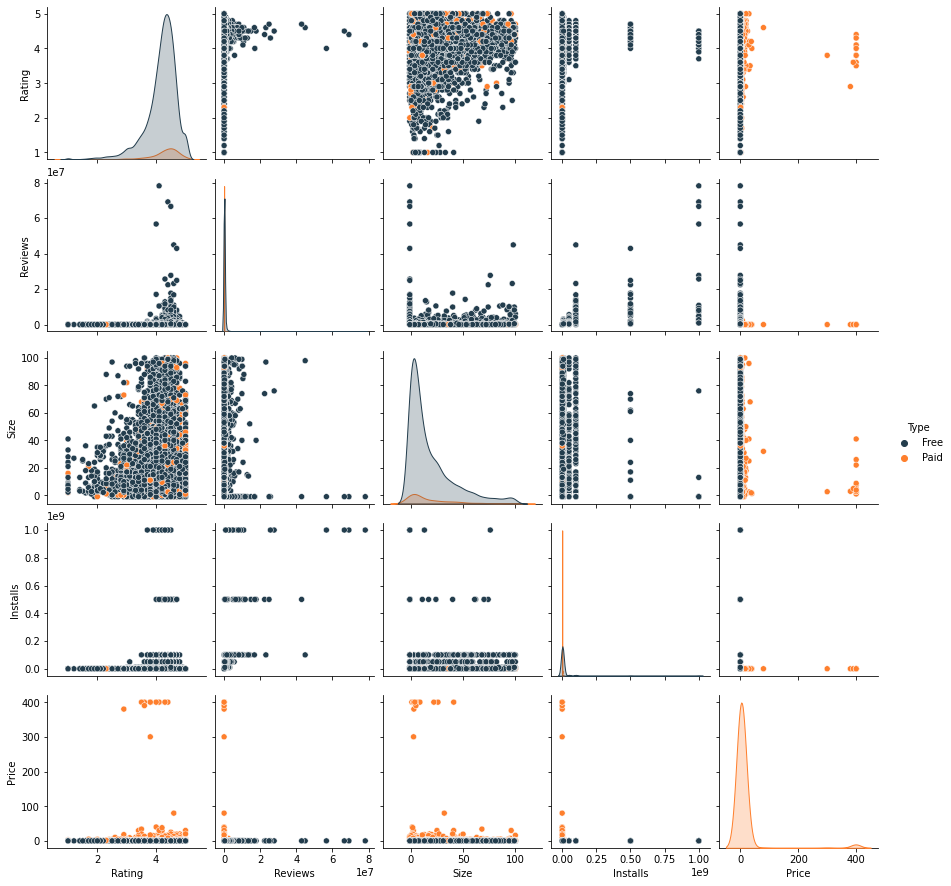

In [16]:
palette1 = ['#233d4d', '#fe7f2d']
sns.pairplot(df, hue = 'Type', palette = palette1)

#### Free vs. Paid app

In [17]:
free_paid = df['Type'].value_counts(normalize = True)
free_paid

Free    0.926306
Paid    0.073694
Name: Type, dtype: float64

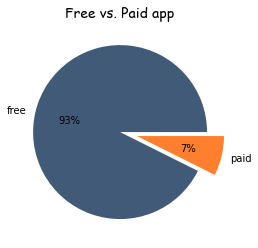

In [18]:
label = ['free' ,'paid']
palette2 = ['#415a77', '#fe7f2d']

plt.pie(free_paid,explode = [0, 0.2], labels = label, colors = palette2, autopct='%1.0f%%')
a = plt.title('Free vs. Paid app', fontsize = 14, fontfamily = 'cursive')

In [19]:
pd.crosstab(df['Content Rating'], df['Type'], normalize = 0)

Type,Free,Paid
Content Rating,,
Adults only 18+,1.000000,0.000000
Everyone,0.922484,0.077516
Everyone 10+,0.898361,0.101639
Mature 17+,0.957983,0.042017
Teen,0.950658,0.049342
Unrated,1.000000,0.000000


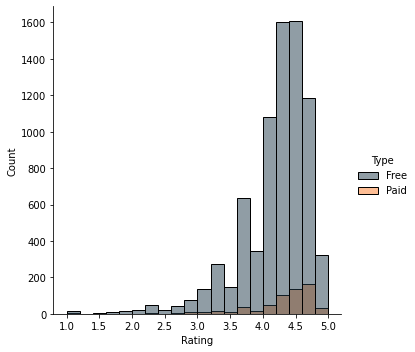

In [20]:
sns.displot(data = df ,x = 'Rating', hue = 'Type', palette =palette1 , bins = 20)

#### count of app in each category

<AxesSubplot:xlabel='Category'>

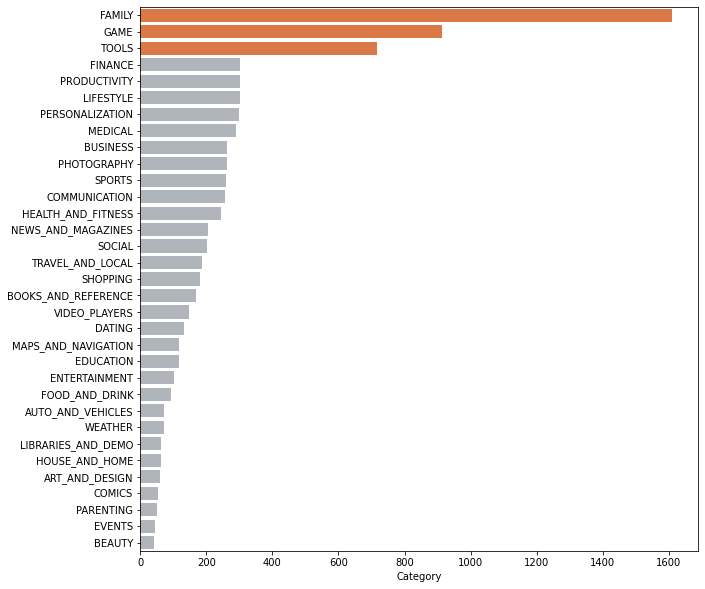

In [21]:
cat_value_counts = df['Category'].value_counts()
plt.figure(figsize = (10, 10))
palette2 = ['#f3722c']*3 + ['#adb5bd']*len(cat_value_counts)
sns.barplot(x = cat_value_counts ,y = cat_value_counts.index, palette = palette2)


#### boxplot of rating in each category

<AxesSubplot:xlabel='Rating', ylabel='Category'>

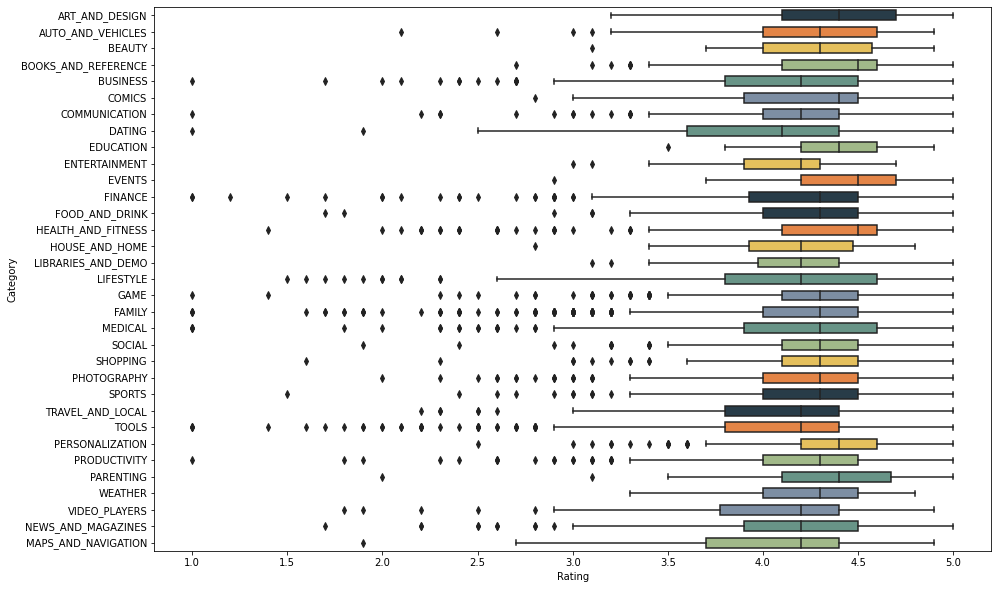

In [22]:
plt.figure(figsize = (15, 10))
palette3 = ['#233d4d', '#fe7f2d', '#fcca46', '#a1c181', '#619b8a', '#778da9']
palette4 = palette3 + palette3[::-1]
sns.boxplot(x = 'Rating', y = 'Category', data = df, width = 0.6, palette = palette4)

<Figure size 720x720 with 0 Axes>

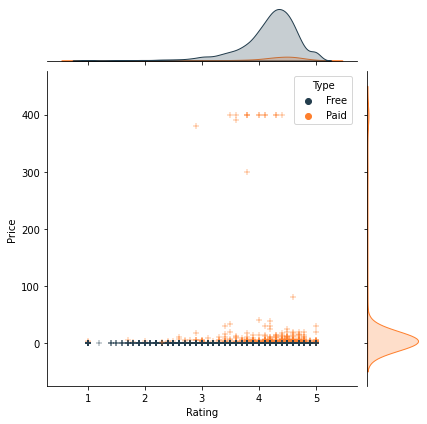

In [23]:
plt.figure(figsize = (10, 10))
sns.jointplot(x = 'Rating', y = 'Price', hue = 'Type', data = df, marker = '+', palette = palette1)

<Figure size 576x576 with 0 Axes>

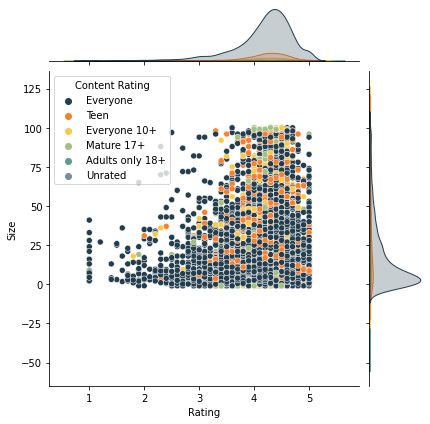

In [24]:
plt.figure(figsize = (8, 8))

sns.jointplot(x = 'Rating', y = 'Size', hue = 'Content Rating', data = df, palette = palette3)

Text(0.5, 0, 'Price')

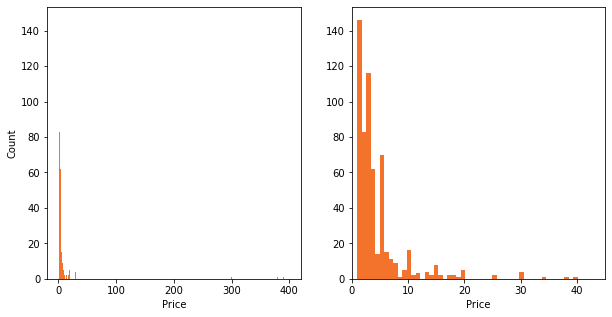

In [42]:
plt.figure(figsize = (10, 5))
paidapp = df[df['Type'] == 'Paid']
a = plt.subplot(121)
a.hist(paidapp['Price'], bins = 500, color  = palette2[0])
plt.xlabel('Price')
plt.ylabel('Count')

b = plt.subplot(122)
b.hist(paidapp['Price'], bins = 500, color  = palette2[0])
plt.xlim((0, 45))
plt.xlabel('Price')


#### 10 top app by rating

<AxesSubplot:xlabel='Reviews', ylabel='App'>

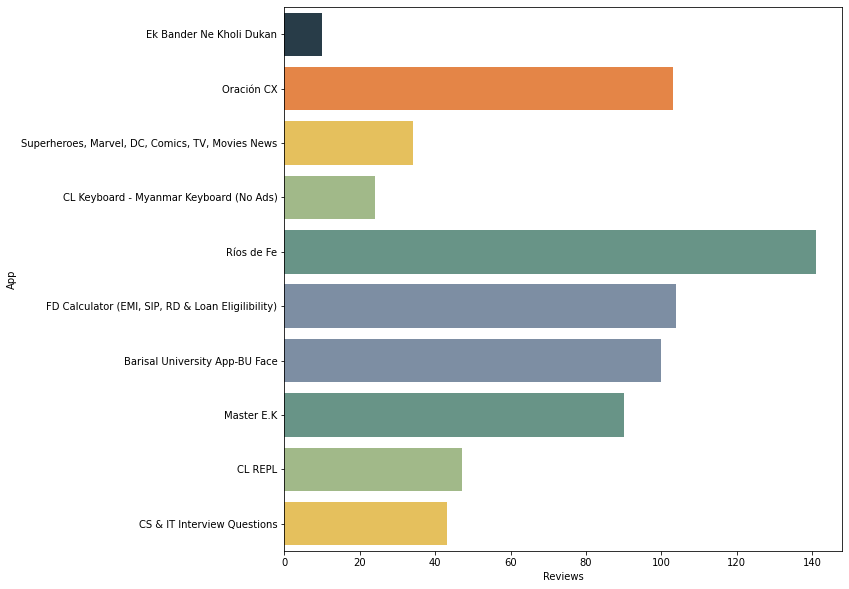

In [26]:
top10_by_rating = df.sort_values(['Rating', 'Installs', 'Reviews'], ascending = False).head(10)
plt.figure(figsize = (10, 10)) 
sns.barplot(y = top10_by_rating['App'],x = top10_by_rating['Reviews'] , palette = palette4)

#### 10 top app by rating (app with more than 10000 Install)

<AxesSubplot:xlabel='Reviews', ylabel='App'>

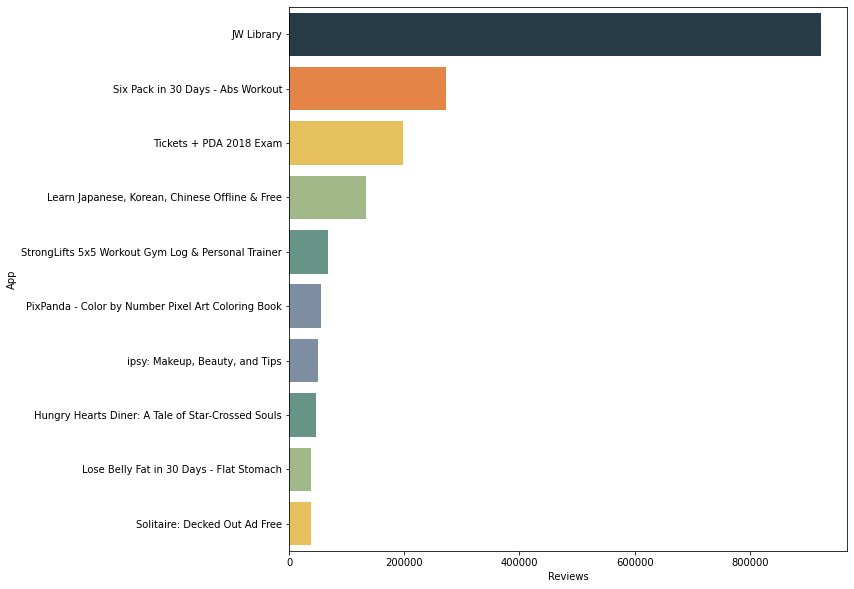

In [27]:
df1 = df[df['Installs'] > 10000]
top10_by_rating = df1.sort_values(['Rating', 'Reviews', 'Installs'], ascending = False).head(10)
plt.figure(figsize = (10, 10))
sns.barplot(y = top10_by_rating['App'],x = top10_by_rating['Reviews'] , palette = palette4)

#### mean of app size for each category

<AxesSubplot:xlabel='Size', ylabel='Category'>

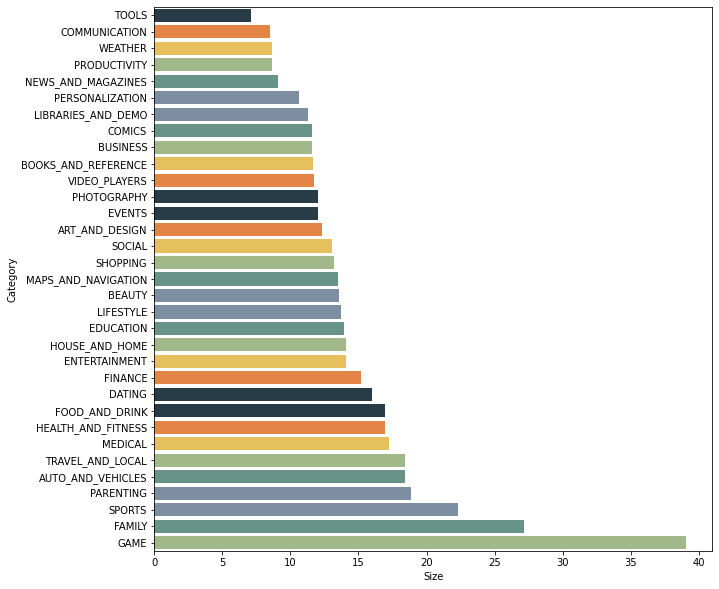

In [28]:
df2 = df.groupby('Category').mean().reset_index()
df2 = df2.sort_values('Size')
plt.figure(figsize = (10, 10))
sns.barplot(y = 'Category', x = 'Size', data = df2, palette = palette4)

#### mean of app review for each category

<AxesSubplot:xlabel='Reviews', ylabel='Category'>

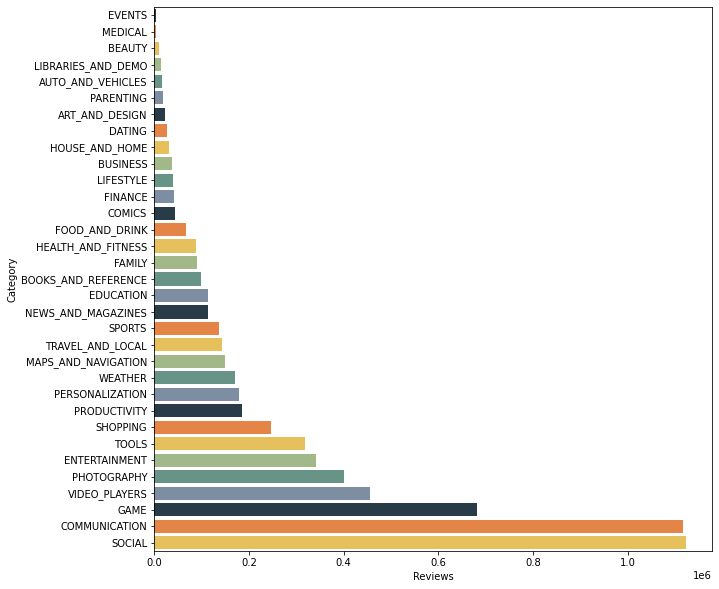

In [29]:
df3 = df2.sort_values('Reviews')
plt.figure(figsize = (10, 10))
sns.barplot(y = 'Category', x = 'Reviews', data = df3, palette = palette3)

#### mean of rating by month (last update)

(3.8, 4.4)

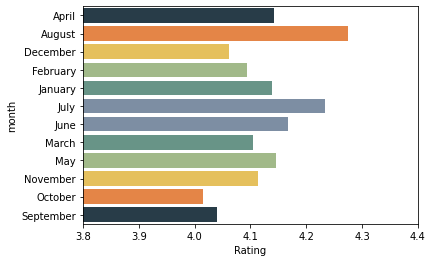

In [30]:
df4 = df.groupby('month').mean().reset_index()
sns.barplot(x = 'Rating', y = 'month',data = df4, palette = palette4)
plt.xlim((3.8, 4.4))